# **Final project** 

### **Dataset description**

* `Host related columns`:

host_id,
host_name,
host_since,
host_location,
host_about,
host_response_time,
host_response_rate,
host_acceptance_rate,
host_is_superhost,
host_thumbnail_url,
host_picture_url,
host_neighbourhood,
host_listings_count,
host_total_listings_count,
host_verifications,
host_has_profile_pic,
host_identity_verified,
host_url.

* `Property and room features`:
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities

* `Location based columns`:
latitude
longitude
zipcode
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
country
country_code
market
smart_location

* `Price and cost fields`:

price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped

* `Review metrics`:

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month

* `Metadata and URLs`:
id
name
listing_url
description
summary
space
neighborhood_overview
picture_url
calendar_updated
scrape_id
last_scraped
source
license

* `Experience and Misc`:
experiences_offered
is_location_exact
requires_license
instant_bookable
is_business_travel_ready




### **Goals of the analysis**

* Price determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to  nightly price?
* Demand seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?
* Review impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?
* Listing characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

* `PCA and Geographical clustering`

### **Importing main libraries**

In [1344]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import folium
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D 

### **Data inspection**

In [1345]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,https://www.airbnb.com/rooms/36121,20250301213336,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,https://www.airbnb.com/rooms/36647,20250301213336,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,https://www.airbnb.com/rooms/38663,20250301213336,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,https://www.airbnb.com/rooms/38833,20250301213336,2025-03-03,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,https://a0.muscache.com/pictures/7554f9e5-4ab0...,166532,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,https://www.airbnb.com/rooms/39282,20250301213336,2025-03-02,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,https://a0.muscache.com/pictures/ef8f43ad-d967...,168525,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54


In [1346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37434 entries, 0 to 37433
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37434 non-null  int64  
 1   listing_url                                   37434 non-null  object 
 2   scrape_id                                     37434 non-null  int64  
 3   last_scraped                                  37434 non-null  object 
 4   source                                        37434 non-null  object 
 5   name                                          37432 non-null  object 
 6   description                                   36441 non-null  object 
 7   neighborhood_overview                         20224 non-null  object 
 8   picture_url                                   37433 non-null  object 
 9   host_id                                       37434 non-null 

In [1347]:
# listing all columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [1348]:
# list of columns to drop
# These columns are not useful for our analysis and will be dropped
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'host_neighbourhood', 'picture_url', 'host_id', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'host_neighbourhood', 'host_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'neighbourhood', 'calendar_updated', 'calendar_last_scraped', 'estimated_occupancy_l365d', 'host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_eoy', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'estimated_occupancy_l365d','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'neighbourhood_group_cleansed',  'availability_60', 'availability_90', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','neighborhood_overview', 'review_scores_value']

In [1349]:
df.drop(columns=columns_to_drop, inplace=True)
# checking the columns after dropping
df.columns

Index(['name', 'description', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_365',
       'number_of_reviews', 'estimated_revenue_l365d', 'first_review',
       'last_review', 'review_scores_rating', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

### **Dealing with missing values**

Replaced numpy nan's and None's with pandas NaN, it is easier to see pandas NaN's.

In [1350]:
# Replace string 'NaN', 'nan', 'None' with actual np.nan
df.replace(['NaN', 'nan', 'None'], np.nan, inplace=True)

In [1351]:
# printing the columns that have more than 0 missing values
missing_columns = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", missing_columns)

# printing missing values in order of the number of missing values
missing_values = df[missing_columns].isna().sum().sort_values(ascending=False)
print("Missing values in each column:\n", missing_values)

Columns with missing values: ['name', 'description', 'host_since', 'host_is_superhost', 'host_listings_count', 'host_verifications', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'price', 'has_availability', 'estimated_revenue_l365d', 'first_review', 'last_review', 'review_scores_rating', 'license', 'reviews_per_month']
Missing values in each column:
 license                    32065
price                      15126
estimated_revenue_l365d    15126
beds                       15082
bathrooms                  14931
review_scores_rating       11787
last_review                11787
first_review               11787
reviews_per_month          11787
bedrooms                    5911
has_availability            5377
description                  993
host_is_superhost            440
host_identity_verified        38
host_verifications            38
host_listings_count           38
host_since                    38
name                           2
dtype: int64


* The `license` column will be preprocessed to a has_licence column (nans become 0s and the rest of them become 1s), assuming that the nans in this column mean that the property has no licence. 
In some cities Airbnb hosts are required by law to register and obtain a licence before they can legally rent their property. The licence field is optional in many regions, so for many listings it's simply NaN. This means that:
    - license depends on the location
    - engineering the has_licence feature would extract the meaningful structure of it in a way that supports our analysis

In [1352]:
# chacking unique values for license
df['license'].unique()

array([nan, 'OSE-STRREG-0001784', 'OSE-STRREG-0000476', ...,
       'OSE-STRREG-0002922', 'OSE-STRREG-0002813', 'OSE-STRREG-0002894'],
      dtype=object)

In [1353]:
# creating binary column: 1 id the license is not NaN, 0 if it is NaN
df['has_license'] = df['license'].apply(lambda x: 1 if pd.notna(x) else 0)

# print the first 5 rows of the new column
print(df['has_license'].head())

# checking the unique values for the new column
print(df['has_license'].unique())

# getting the index of license column
license_index = df.columns.get_loc('license')

# moving the has_license column after the license column
df.insert(license_index + 1, 'has_license', df.pop('has_license'))

# dropping the license column
df.drop(columns=['license'], inplace=True)

0    0
1    0
2    1
3    1
4    1
Name: has_license, dtype: int64
[0 1]


In [1354]:
!pip install missingno
import missingno as msno

<Axes: >

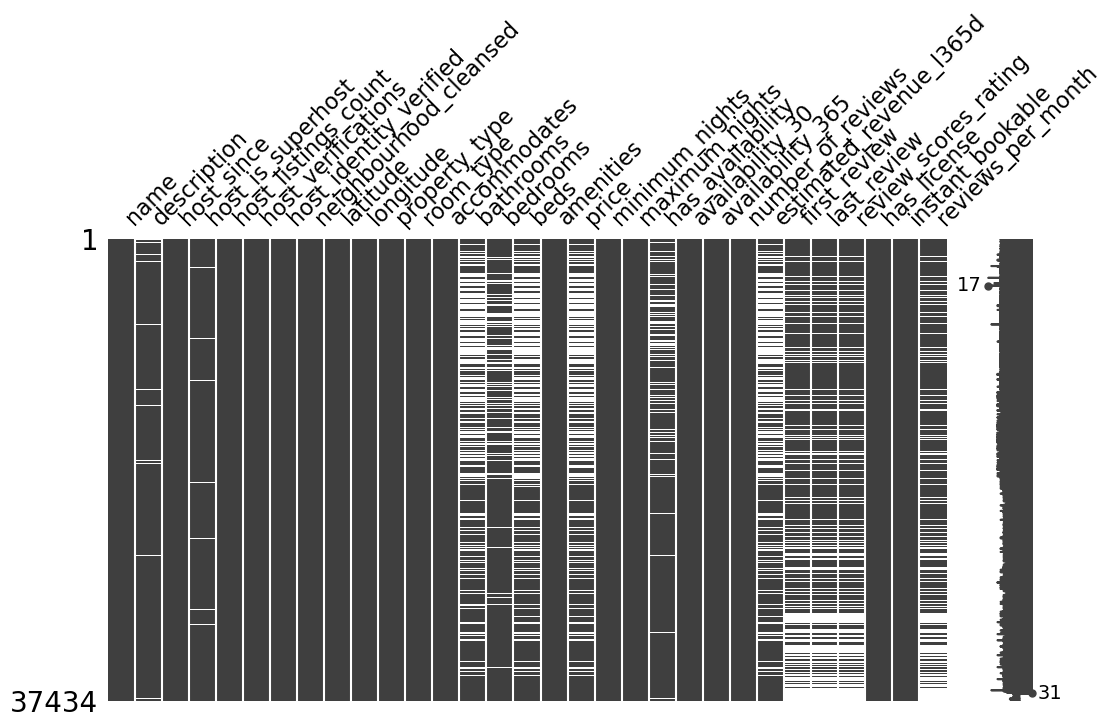

In [1355]:
# visualising the missing values in dataframe
msno.matrix(df, figsize=(12, 6))

<Axes: >

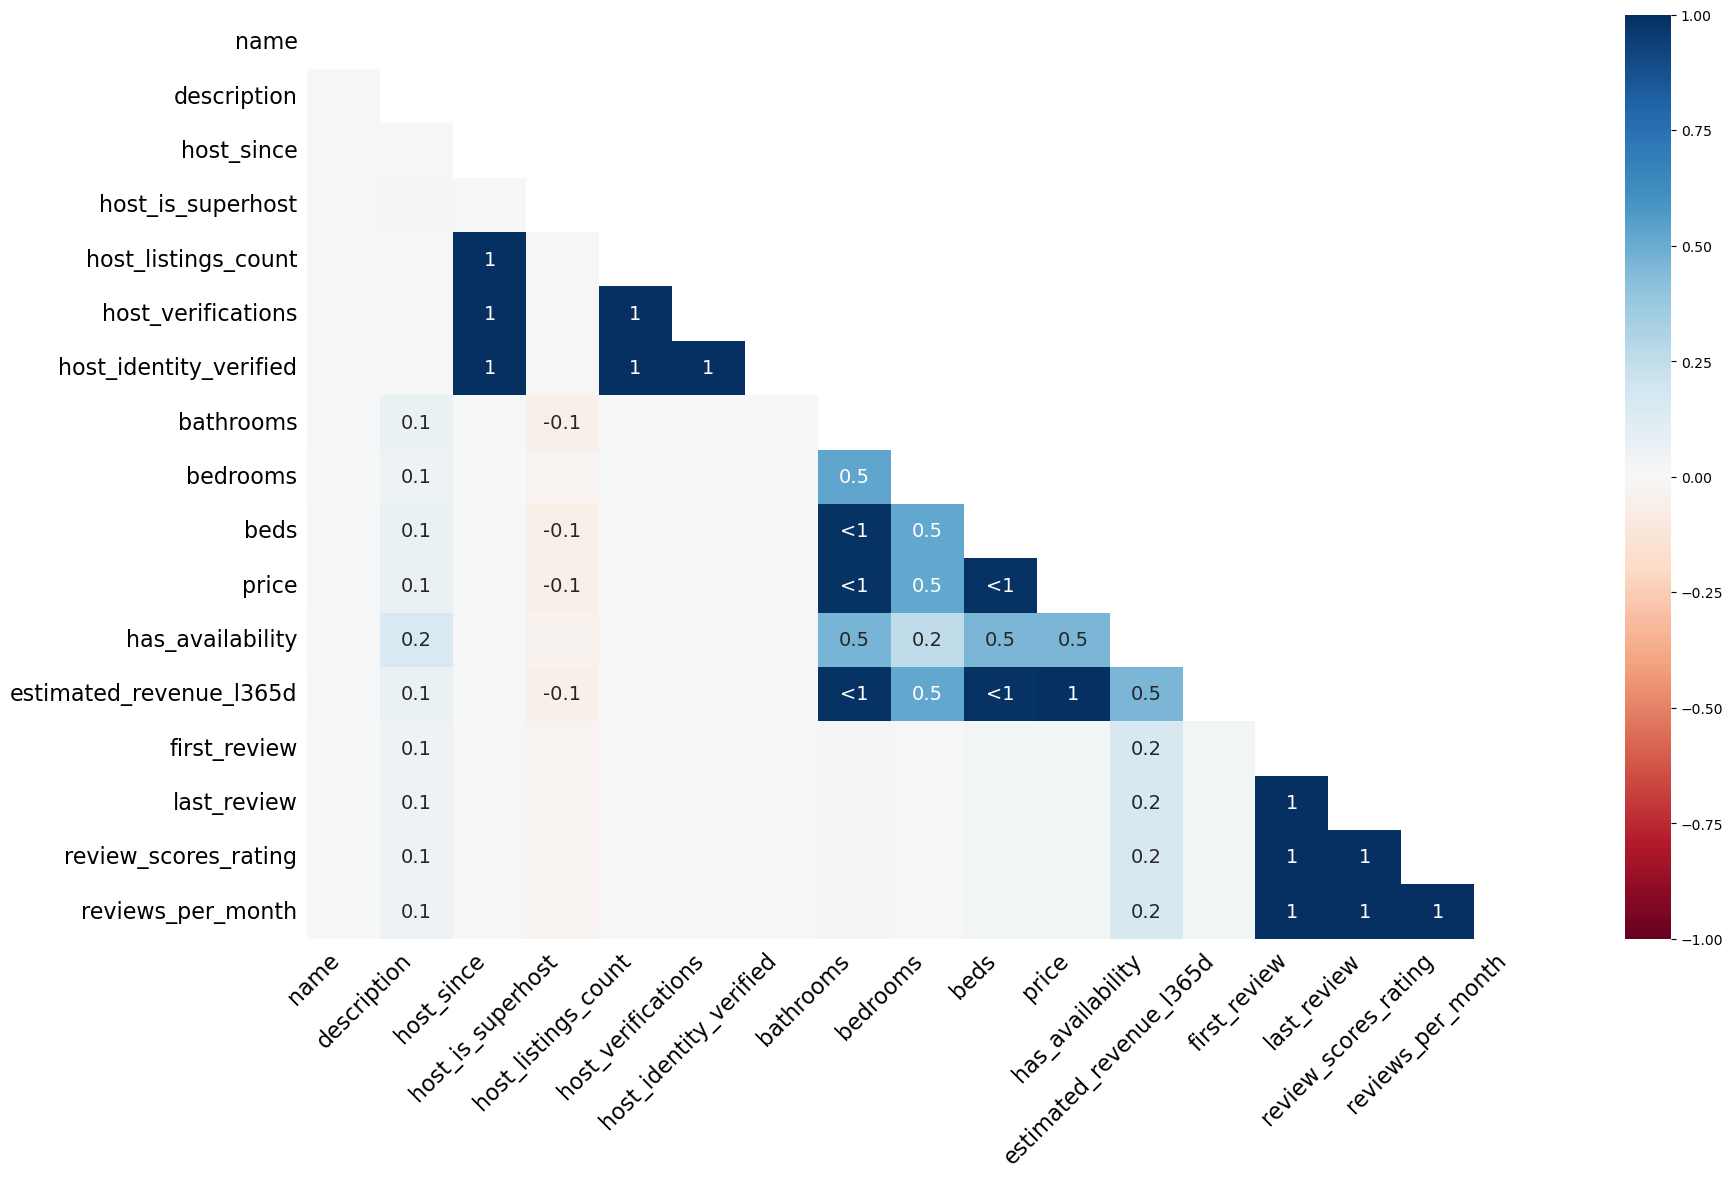

In [1356]:
# heatmap
msno.heatmap(df)

<Axes: >

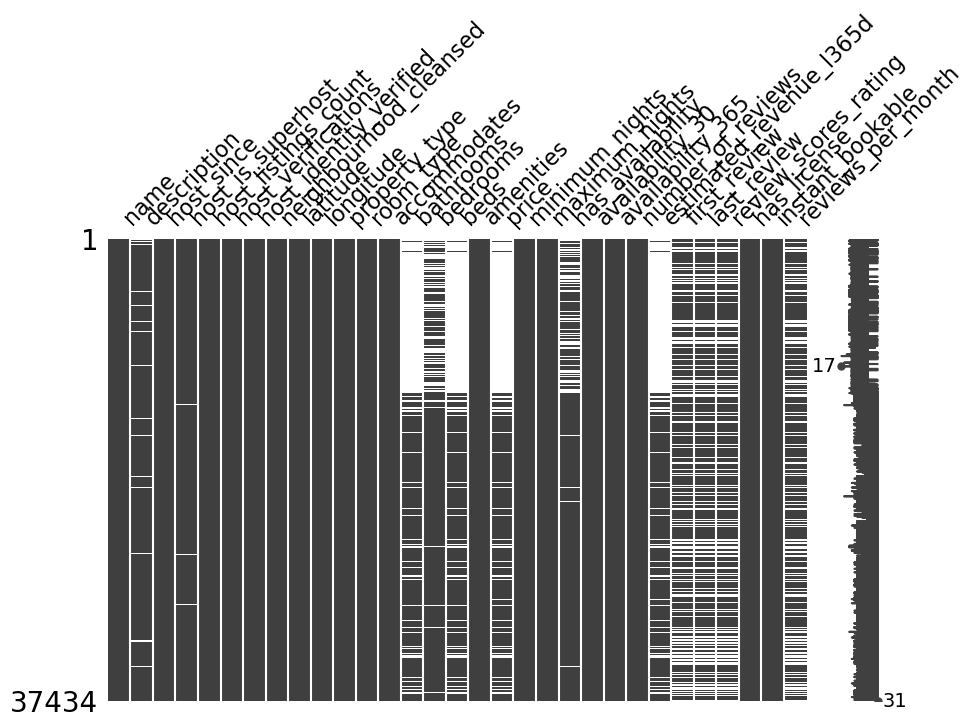

In [1357]:
# sorted by availability_365
sorted_availability = df.sort_values('availability_365', ascending=True)
msno.matrix(sorted_availability, figsize=(10, 6))

In [1358]:
# visualising the first 10 rows of the dataset, first 20 columns of the dataset
sorted_availability.iloc[:10, :20].head(10)

,name,description,host_since,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
15929,Pent House Nest Filled with Natural Light,Beautiful pent house with 1 bedroom apartment ...,2013-10-04,f,1.0,"['email', 'phone']",f,Bushwick,40.699960,-73.933230,Private room in rental unit,Private room,2,NaN,NaN,NaN,"[""Kitchen"", ""Fire extinguisher"", ""First aid ki...",NaN,30,1125
11177,"Prospect Park, Bk Museum, Botanic Gardens and You","Right smack in the center of Brooklyn, one blo...",2012-06-19,f,1.0,"['email', 'phone']",t,Prospect Heights,40.673160,-73.965000,Entire rental unit,Entire home/apt,3,NaN,1.0,NaN,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",NaN,30,31
11178,River front Brand New upper East side apt,A beautiful brand new Upper east side apartmen...,2017-01-16,f,1.0,"['email', 'phone']",t,Upper East Side,40.768990,-73.948680,Entire rental unit,Entire home/apt,2,NaN,1.0,NaN,"[""Oven"", ""First aid kit"", ""Extra pillows and b...",NaN,30,1125
11179,"ONE Room →→→20mins to TimesSQ ☆彡 COZY, COZY, ...",This cozy bedroom is a great place to relax af...,2014-08-01,f,303.0,"['email', 'phone']",t,Woodside,40.742560,-73.902770,Private room in townhouse,Private room,2,NaN,NaN,NaN,"[""Hangers"", ""Wifi"", ""Kitchen"", ""Private living...",NaN,30,1125
11180,Cozy Room in Woodside Queens!,"The apartment is located in Woodside, Queens.<...",2018-07-05,f,279.0,"['email', 'phone']",t,Woodside,40.742490,-73.893170,Private room in townhouse,Private room,2,NaN,NaN,NaN,"[""Air conditioning"", ""Hangers"", ""Carbon monoxi...",NaN,30,1125
27779,Private BathRoom @Grand Ave,"This apartment is located 3min from subway ""Gr...",2018-07-24,f,256.0,"['email', 'phone']",t,Elmhurst,40.736320,-73.878840,Private room in home,Private room,2,NaN,NaN,NaN,"[""Dedicated workspace"", ""Hangers"", ""Carbon mon...",NaN,30,1125
11184,PRIVATE APARTMENT IN DOORMAN BUILDING,Fully furnished alcove studio with a walk-in c...,2016-09-12,f,1.0,"['email', 'phone']",t,Financial District,40.704080,-74.006870,Entire rental unit,Entire home/apt,2,NaN,NaN,NaN,"[""Gym"", ""Hair dryer"", ""Self check-in"", ""Essent...",NaN,30,1125
11186,Soho neighborhood apartment,NaN,2017-12-20,f,1.0,"['email', 'phone']",f,SoHo,40.725320,-74.000370,Private room in rental unit,Private room,1,NaN,1.0,NaN,"[""Bed linens"", ""Fire extinguisher"", ""First aid...",NaN,30,1125
11188,NYC 3 Story townhouse near subway & Yankee Sta...,Welcome to a huge historic 3 story townhouse. ...,2015-03-17,f,3.0,"['email', 'phone', 'work_email']",t,Longwood,40.824950,-73.903090,Private room in townhouse,Private room,4,NaN,5.0,NaN,"[""Outdoor furniture"", ""Kitchen"", ""Children\u20...",NaN,30,30
27777,Private BathRoom 10min from Roosevelt 74st sta...,"This apartment is located 3min from subway ""Gr...",2014-08-01,f,303.0,"['email', 'phone']",t,Elmhurst,40.737976,-73.880777,Private room in home,Private room,2,NaN,NaN,NaN,"[""Dedicated workspace"", ""Hangers"", ""Carbon mon...",NaN,30,1125


**Observation**: so it seems that the columns with lowest availability are more likely to have missing values in the bathrooms, beds, price and estimated_revenue_l365d columns.

<Axes: >

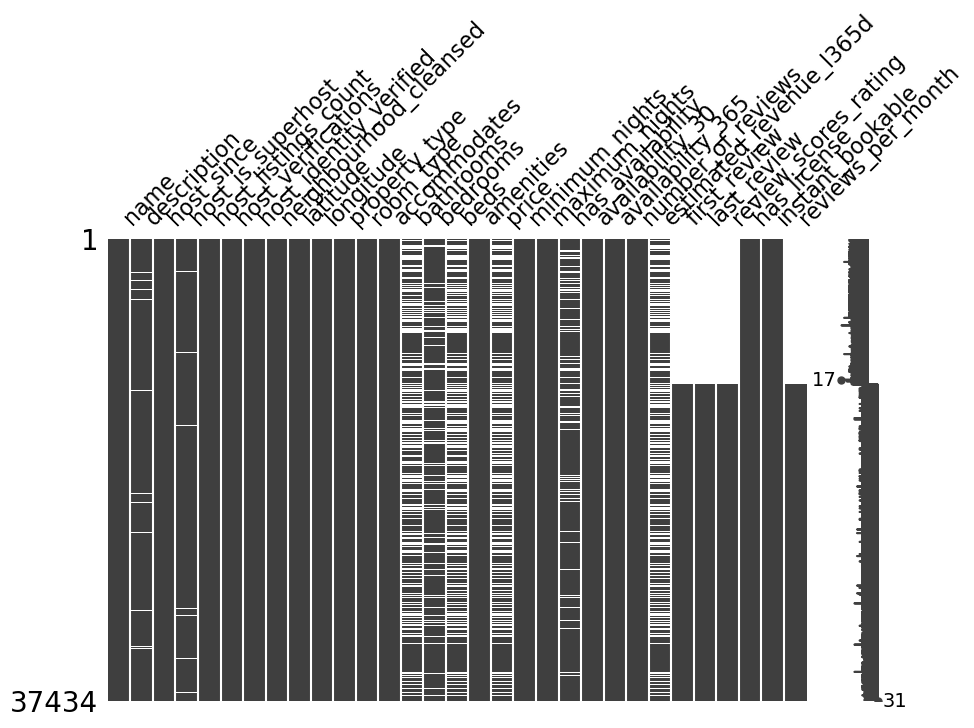

In [1359]:
# sorted by number_of_reviews
sorted_reviews = df.sort_values('number_of_reviews', ascending=True)
msno.matrix(sorted_reviews, figsize=(10, 6))

In [1360]:
# creating a dataset that contains only the rows that have null values in first_review, last_review, and review_scores_value
subset_nulls = df[df[['first_review', 'last_review', 'review_scores_rating']].isnull().any(axis=1)]

# getting all unique values for the number_of_reviews in the subset_nulls dataset
print(subset_nulls['number_of_reviews'].unique())

[0]


**Observation:** So it seems that first_review, last_review and review_scores_value only has missing values in the rows that have values 0 or one for the number_of_reviews.

In [1361]:
# printing all rows of the dataset that have 1 as value of number_of_reviews column
print(df[df['number_of_reviews'] == 1])

                                                    name  \
8      Uptown Sanctuary w/ Private Bath (Month to Month)   
49                     Cozy Private Room in West Harlem!   
61                        Cozy Studio in Great Location!   
140                   New Clean Spacious Bed & Breakfast   
187           Room in Chic Modern High Line Luxury- New!   
...                                                  ...   
36520           Lux Crown Heights Townhouse Second Floor   
36531   Cozy 2 beds near SoHo/Perfect for Shares or Solo   
36542                   Hidden Gem Studio in Bed-Stuy BK   
36653                     Cozy Private room in Manhattan   
36657                              Apartment in Brooklyn   

                                             description  host_since  \
8      This charming distancing-friendly month-to-mon...  2009-05-07   
49     Located in the heart of West Harlem, 7-10 min ...  2011-05-10   
61     This is a great fully furnished studio, lots o...  2010-

Even though patterns in the data do exist, the most important attributes for our analysis have a lot of missing values (and they seem to be missing together which makes it more difficult to solve these patterns). For example last_review, first_review and review_scores_rating are missing for rows that take 0 and 1 as values for the number_of_reviews but we cannot predict the reviews based on their number, which leads us to believe that in most of the cases we might be dealing with MNAR (for price, beds, bathrooms, estimated_revenue, and the reviews columns). Dropping the rows from this features will not have that much of an importance to the other attributes since they are the important ones. Therefore we would have to drop these missing values, even though this would reduce the dimension of the dataset considerably.

The only thing left is to drop the missing values in a way to still retain several thousand rows.

In [1362]:
# Defined the columns of interest
cols_to_check = ['price', 'beds', 'bathrooms', 'estimated_revenue_l365d']

# Droped rows where ALL of those are missing at the same time
df = df[~df[cols_to_check].isnull().all(axis=1)]

In [1363]:
df.isna().sum().sort_values(ascending=False)[:15]

reviews_per_month          6901
review_scores_rating       6901
last_review                6901
first_review               6901
description                 405
host_is_superhost           374
has_availability            246
estimated_revenue_l365d     201
price                       201
beds                        157
bedrooms                     49
host_since                   20
host_listings_count          20
host_verifications           20
host_identity_verified       20
dtype: int64

In [1364]:
df.shape

(22509, 31)

Since the reviews do not exceed 5.0 and they are somewhat according to the real-life scenario, we can impute the missings with Median grouped by neighbourhood and price in the review related columns (because as it can be seen later on in the project these are important factors that affect reviews). For this we need to clean and convert data types for this columns.

* Convert host_since, first_review, last_review columns into pandas Datetime and normalize

In [1365]:
# Convert to datetime and normalize (remove time for calculations)
for col in ['host_since', 'first_review', 'last_review']:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

# Optional: Create formatted string columns for display or export
# df['host_since_str'] = df['host_since'].dt.strftime('%Y-%m-%d')
# df['first_review_str'] = df['first_review'].dt.strftime('%Y-%m-%d')
# df['last_review_str'] = df['last_review'].dt.strftime('%Y-%m-%d')


In [1366]:
df['first_review'] 

0       2010-12-11
1       2010-10-04
2       2012-07-09
3       2010-08-28
4       2010-08-02
           ...    
37429          NaT
37430          NaT
37431          NaT
37432          NaT
37433          NaT
Name: first_review, Length: 22509, dtype: datetime64[ns]

* clean reviews_per_month for readabilty

In [1367]:
# unique values in column reviews_per_month
df['reviews_per_month'].unique()

array([5.0000e-02, 5.8000e-01, 2.8000e-01, 1.3600e+00, 1.5400e+00,
       2.5000e-01, 1.0100e+00, 3.0000e-02, 1.3400e+00, 2.1600e+00,
       7.0000e-02, 1.0300e+00, 9.5000e-01, 1.1000e-01, 8.9000e-01,
       7.4000e-01, 3.9000e-01, 1.2500e+00, 4.0000e-02, 1.3200e+00,
       7.1000e-01, 3.1000e-01, 4.5000e-01, 4.3000e-01, 9.7000e-01,
       2.9000e-01, 3.3000e-01, 4.4200e+00, 8.0000e-02,        nan,
       7.8000e-01, 1.6900e+00, 1.0000e-01, 2.8100e+00, 2.1100e+00,
       1.0700e+00, 1.6500e+00, 2.0000e-01, 4.2000e-01, 1.7000e-01,
       1.6000e+00, 1.5800e+00, 3.0000e-01, 9.0000e-01, 1.4700e+00,
       3.8000e-01, 9.0000e-02, 6.1000e-01, 1.9000e-01, 6.8000e-01,
       8.3000e-01, 1.1200e+00, 1.7400e+00, 1.7700e+00, 1.1800e+00,
       5.2000e-01, 2.6700e+00, 1.4000e-01, 1.5700e+00, 1.7000e+00,
       1.1700e+00, 2.7000e-01, 1.8000e-01, 7.5000e-01, 1.9800e+00,
       4.9000e-01, 2.2400e+00, 4.0700e+00, 3.5000e-01, 2.5500e+00,
       3.3700e+00, 1.6700e+00, 1.1600e+00, 3.2400e+00, 2.3100e

In [1368]:
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')
print(df['reviews_per_month'].head())

0    0.05
1    0.58
2    0.28
3    1.36
4    1.54
Name: reviews_per_month, dtype: float64


* The price column needs to be of int or float type (depending on its values) so we need to investigate its values to see the reason it is of object dtype.

In [1369]:
# unique values for the column price
print(df['price'].unique())

['$200.00' '$82.00' '$765.00' ... '$872.00' '$16.00' '$14.00']


In [1370]:
df.dropna(subset=['price'], inplace=True)

In [1371]:
# Strip whitespace and convert prices
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [1372]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipykernel_5004/2337335738.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [1373]:
print(df['price'].unique())

[200.  82. 765. ... 872.  16.  14.]


In [1374]:
def fill_missing_by_group_median(df, columns, group_cols):
    for col in columns:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))
    return df

In [1375]:
# Columns to fill
cols_to_fill = ['review_scores_rating', 'reviews_per_month', 'first_review', 'last_review']

# Group by these columns:
group_by = ['neighbourhood_cleansed', 'price']

# Fill missing values
df = fill_missing_by_group_median(df, cols_to_fill,group_by)

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/home/irakli/anaconda3/envs/EDA-env/lib/python3.12/site

In [1376]:
for col in ['host_since', 'first_review', 'last_review']:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

# Optional: Create formatted string columns for display or export
df['host_duration_days'] = (pd.Timestamp.today() - df['host_since']).dt.days
df['active_days'] = (df['last_review'] - df['first_review']).dt.days
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month
df['review_date'] = pd.to_datetime(df['review_year'].astype(str) + '-' + df['review_month'].astype(str) + '-01', errors='coerce')

/tmp/ipykernel_5004/1233888274.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [1377]:
df.isna().sum().sort_values(ascending=False)[:15]

review_date               22308
review_month               3222
first_review               3222
last_review                3222
review_scores_rating       3222
active_days                3222
review_year                3222
reviews_per_month          3222
description                 405
host_is_superhost           374
has_availability            246
beds                         79
bedrooms                     49
host_identity_verified       20
host_verifications           20
dtype: int64

... to be continued :)

### **Checking data types**

* Map the {True False} values to 0 and 1 for simplicity (columns host_is_superhost and host_identity_verified)

In [1378]:
# get unique values for host_is_superhost
print(df['host_is_superhost'].unique())

['f' 't' nan]


In [1379]:
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

In [1380]:
print(df['host_is_superhost'].unique())

[0 1]


In [1381]:
# get unique values for host_identity_verified
print(df['host_identity_verified'].unique())

['t' 'f' nan]


In [1382]:
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

In [1383]:
print(df['host_identity_verified'].unique())

[1 0]


In [1384]:
# unique values for instant_bookable
print(df['instant_bookable'].unique())

['f' 't']


In [1385]:
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

* The room_type column can be converted to category (unordered) because it only has a few values

In [1386]:
# checking unique values for room_type
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [1387]:
# change the room_type value Entire home/apt to Entire home
df['room_type'] = df['room_type'].replace('Entire home/apt', 'Entire home')

In [1388]:
# verifying the change
print(df['room_type'].unique())

['Private room' 'Entire home' 'Hotel room' 'Shared room']


In [1389]:
# convert to categorical dtype
df['room_type'] = df['room_type'].astype('category')

* Because it would make sense that bathrooms, bedrooms and beds should be int, not float, we should check why these cols have float values.

In [1390]:
# check unique values for bathrooms, bedrooms, and beds
print(df['bathrooms'].unique())
print(df['bedrooms'].unique())
print(df['beds'].unique())

[ 1.   2.5  nan  1.5  2.   3.   0.   4.5  3.5  0.5 15.5 10.5  4.   5.
  5.5  6.   7.   7.5]
[ 1.  5.  2.  0.  3. nan  4. 14.  6.  7.  9.  8. 15.]
[ 1.  5.  2.  4.  3.  0.  9.  6.  8.  7. 42. 10. 11. 14. 13. nan 12. 21.]


It seems that the bathrooms column takes a lot of floats! We will correct this by approximating the values to the closest integer (if the bathroom number is 1.5, we will turn it into 1). Also, the missing values could be replaced with 0 since no bedrooms can mean 0 bedrooms and in the bedroom column there are only 48 missing values.

In [1391]:
print(df['bathrooms'].unique())

[ 1.   2.5  nan  1.5  2.   3.   0.   4.5  3.5  0.5 15.5 10.5  4.   5.
  5.5  6.   7.   7.5]


In [1392]:
# drop nans in bedrooms amd convert to int
df = df.dropna(subset=['bedrooms'])
df['bedrooms'] = df['bedrooms'].astype('int')

In [1393]:
# convert beds to int
print(df['beds'].unique())

[ 1.  5.  2.  4.  3.  0.  9.  6.  8.  7. 42. 10. 11. 14. 13. nan 12. 21.]


In [1394]:
df.shape

(22259, 36)

In [1395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22259 entries, 0 to 37433
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     22259 non-null  object        
 1   description              21859 non-null  object        
 2   host_since               22239 non-null  datetime64[ns]
 3   host_is_superhost        22259 non-null  int64         
 4   host_listings_count      22239 non-null  float64       
 5   host_verifications       22239 non-null  object        
 6   host_identity_verified   22259 non-null  int64         
 7   neighbourhood_cleansed   22259 non-null  object        
 8   latitude                 22259 non-null  float64       
 9   longitude                22259 non-null  float64       
 10  property_type            22259 non-null  object        
 11  room_type                22259 non-null  category      
 12  accommodates             22259 non-nu

In [1396]:
df.isna().sum().sort_values(ascending=False)[:15]

review_date             22259
reviews_per_month        3211
review_month             3211
first_review             3211
last_review              3211
review_year              3211
active_days              3211
review_scores_rating     3211
description               400
has_availability          246
beds                       78
host_duration_days         20
host_verifications         20
host_listings_count        20
host_since                 20
dtype: int64

### **Data Preprocessing**

* Clean Description column from html formats.

In [1397]:
df['description'] = df['description'].replace('<br />', '').replace('<br/>', '').replace('<br>', '')

In [1398]:
df['description'] = df['description'].fillna('')

* Replace the price range from 0 to 25 as 25, it's a puris fuli

In [1399]:
df['price'].replace(range(0, 25), 25, inplace=True)

/tmp/ipykernel_5004/3710474998.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### If price ≈ implied_price, it confirms price is daily.

In [1400]:
# Step 1: Drop rows with missing values in price-related columns
df_test = df[['price', 'availability_365', 'estimated_revenue_l365d']].dropna()

# Step 2: Keep only rows with availability > 0 to avoid division by zero
df_test = df_test[df_test['availability_365'] > 0]

# Step 3: Compute implied daily price from estimated revenue
df_test['implied_price'] = df_test['estimated_revenue_l365d'] / df_test['availability_365']

# Optional: Show a sample comparison
print(df_test[['price', 'implied_price']].sample(50))

        price  implied_price
31011   757.0      36.996241
12632   110.0      18.131868
25713   505.0       0.000000
30066   151.0     107.377778
34336   187.0      33.392857
23498   200.0       0.000000
13634   170.0      17.894737
23503   185.0       0.000000
23802   116.0       0.000000
18902   135.0       0.000000
1524     88.0      18.857143
15757    35.0       0.000000
21639    37.0      31.714286
24424    40.0       0.000000
16105    84.0      65.882353
3524     83.0     100.785714
35201   240.0       0.000000
34792   496.0       0.000000
35178    54.0       0.000000
21614    56.0       0.000000
36614   153.0       0.000000
33137    74.0     177.600000
21003   135.0       0.000000
11036   133.0     241.186567
31693    36.0       0.000000
36133   195.0       0.000000
27359    44.0       7.232877
17799   191.0      74.174757
33206   125.0       0.000000
18312   179.0       0.000000
22623    67.0       0.000000
37228    79.0       0.000000
34168   650.0       0.000000
16444   139.0 

In [1401]:
df_valid = df[(df['availability_365'] > 0) & (df['estimated_revenue_l365d'] > 0)].copy()


In [1402]:
df_valid['implied_price'] = df_valid['estimated_revenue_l365d'] / df_valid['availability_365']


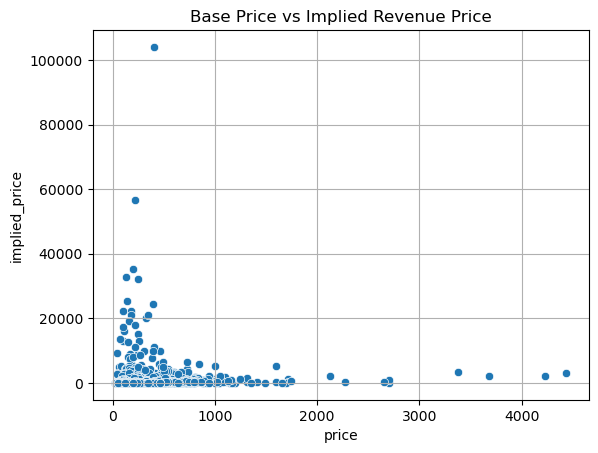

In [1403]:

sns.scatterplot(data=df_valid, x='price', y='implied_price')
plt.title('Base Price vs Implied Revenue Price')
plt.grid(True)
plt.show()

In [1404]:
df_valid = df_valid[(df_valid['price'] < 1000) & (df_valid['implied_price'] < 1000)]


In [1405]:
df = df_valid


In [1406]:
print("\nKendall Tau correlation between price and implied_price:")
print(df_valid[['price', 'implied_price']].corr(method='kendall'))


Kendall Tau correlation between price and implied_price:
                  price  implied_price
price          1.000000       0.349785
implied_price  0.349785       1.000000


### Typical nightly Airbnb prices:

### Budget rooms: $30–$60

#### Average: $70–$200

### Luxury: $300–$1000+

### If the prices look like:

### $100–$5000: likely daily

### $1000–$20000 regularly: could be monthly (but not in your case, unless listings are ultra-premium)



In [1407]:
df_test_30 = df[['price', 'availability_30', 'estimated_revenue_l365d']].dropna()

# Step 2: Filter out rows where availability_60 is zero to avoid division by zero
df_test_30 = df_test_30[df_test_30['availability_30'] > 0]

# Step 3: Estimate implied price for next 60 days (approximation)
df_test_30['implied_price_30'] = df_test_30['estimated_revenue_l365d'] / df_test_30['availability_30']

# Step 4: Display a sample of the comparison
print(df_test_30[['price', 'implied_price_30']].sample(10))

       price  implied_price_30
33447  176.0       1267.200000
26254  182.0       1785.000000
1961   107.0        279.130435
30365  127.0        780.814815
24434   95.0       2422.500000
33624   99.0       5049.000000
22751  129.0      23220.000000
20080  460.0       5331.818182
1071   200.0       1758.620690
15925  117.0        242.068966


In [1408]:
corr_30 = df_test_30[['price', 'implied_price_30']].corr(method='kendall')
print("\nKendall Tau correlation between price and implied 30-day price:")
print(corr_30)


Kendall Tau correlation between price and implied 30-day price:
                     price  implied_price_30
price             1.000000          0.253856
implied_price_30  0.253856          1.000000


In [1409]:
df_test_30_filtered = df_test_30[(df_test_30['price'] < 1000) & (df_test_30['implied_price_30'] < 1000)]


In [1410]:
# unique values for the column amenities
df['amenities'].unique()

array(['["Oven", "Rice maker", "Laundromat nearby", "Luggage dropoff allowed", "Dedicated workspace", "Keypad", "Cooking basics", "Microwave", "Hair dryer", "Window AC unit", "Self check-in", "Essentials", "Long term stays allowed", "Iron", "Bed linens", "TV with standard cable", "Dishwasher", "Stove", "Heating", "Free street parking", "Dishes and silverware", "Hot water", "Wifi", "Kitchen", "Coffee maker", "Refrigerator", "Hangers", "Baking sheet", "Freezer"]',
       '["Oven", "Fire extinguisher", "Extra pillows and blankets", "Cooking basics", "Microwave", "Hair dryer", "Essentials", "Iron", "Bed linens", "Dishwasher", "Stove", "Heating", "TV", "Washer", "Free street parking", "Air conditioning", "Dishes and silverware", "Carbon monoxide alarm", "Hot water", "Wifi", "Smoke alarm", "Kitchen", "Coffee maker", "Refrigerator", "Hangers", "Shampoo"]',
       '["Fire extinguisher", "Extra pillows and blankets", "Hair dryer", "Host greets you", "Iron", "Bed linens", "Paid parking off premi

* room_type and property_type columns are similar in the sense that room_type is property_type fit into stricter categories; therefore property_type is redundand in our analysis, especially because room_type is better for PCA and clustering.

In [1411]:
# get unique values for room_type
print(df['room_type'].unique())

['Private room', 'Entire home', 'Hotel room', 'Shared room']
Categories (4, object): ['Entire home', 'Hotel room', 'Private room', 'Shared room']


In [1412]:
# get unique values for property_type
print(df['property_type'].unique())

['Private room in rental unit' 'Entire rental unit'
 'Private room in guest suite' 'Entire condo' 'Entire loft'
 'Private room in condo' 'Private room in bed and breakfast' 'Entire home'
 'Private room in home' 'Private room in loft' 'Entire townhouse'
 'Private room in townhouse' 'Entire guest suite' 'Room in boutique hotel'
 'Private room' 'Shared room in rental unit' 'Entire serviced apartment'
 'Private room in villa' 'Entire place' 'Shared room in townhouse'
 'Private room in tiny home' 'Entire bungalow'
 'Private room in guesthouse' 'Entire guesthouse'
 'Room in serviced apartment' 'Shared room in loft' 'Room in hotel'
 'Shared room in home' 'Room in aparthotel' 'Private room in bungalow'
 'Entire villa' 'Private room in resort' 'Entire cottage'
 'Shared room in condo' 'Tiny home' 'Private room in vacation home'
 'Private room in hostel' 'Private room in kezhan'
 'Private room in serviced apartment' 'Private room in casa particular'
 'Entire vacation home' 'Private room in ranch'

In [1413]:
# check for each values in the room_type column, the coresponding values in the property_type column
for room_type in df['room_type'].unique():
    print(f"Room Type: {room_type}")
    print(df[df['room_type'] == room_type]['property_type'].unique())
    print()

Room Type: Private room
['Private room in rental unit' 'Private room in guest suite'
 'Private room in condo' 'Private room in bed and breakfast'
 'Private room in home' 'Private room in loft' 'Private room in townhouse'
 'Private room' 'Private room in villa' 'Private room in tiny home'
 'Room in boutique hotel' 'Private room in guesthouse' 'Room in hotel'
 'Room in aparthotel' 'Private room in bungalow' 'Private room in resort'
 'Private room in vacation home' 'Private room in hostel'
 'Private room in kezhan' 'Private room in serviced apartment'
 'Private room in casa particular' 'Private room in ranch']

Room Type: Entire home
['Entire rental unit' 'Entire condo' 'Entire loft' 'Entire home'
 'Entire townhouse' 'Entire guest suite' 'Entire serviced apartment'
 'Entire place' 'Entire bungalow' 'Entire guesthouse' 'Entire villa'
 'Entire cottage' 'Room in aparthotel' 'Tiny home' 'Entire vacation home']

Room Type: Hotel room
['Room in boutique hotel' 'Room in serviced apartment' 'Room

In [1414]:
# For columns that have the property_type value as 'Room in hotel' or 'Room in aparthotel', changing the room_type value to 'Hotel room'
df.loc[df['property_type'].isin(['Room in hotel', 'Room in aparthotel']), 'room_type'] = 'Hotel room'

In [1415]:
df.isna().sum()

name                          0
description                   0
host_since                   11
host_is_superhost             0
host_listings_count          11
host_verifications           11
host_identity_verified        0
neighbourhood_cleansed        0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     4
bedrooms                      0
beds                         37
amenities                     0
price                         0
minimum_nights                0
maximum_nights                0
has_availability              9
availability_30               0
availability_365              0
number_of_reviews             0
estimated_revenue_l365d       0
first_review                  0
last_review                   0
review_scores_rating          0
has_license                   0
instant_bookable              0
reviews_per_month             0
host_dur

### **Feature Engineering**

* `host_duration_days`: feature that calculates the number of days since a host has joined Airbnb

In [1416]:
df['host_duration_days'] = (pd.Timestamp.today() - df['host_since']).dt.days

* `active_days`: fature that calculates the number of days the user has been active (in this case being active means that the user leaves reviews for properties)

In [1417]:
df['active_days'] = (df['last_review'] - df['first_review']).dt.days


* `is_popular`: describes the popularity by review count

In [1418]:
df['is_popular'] = (df['number_of_reviews'] > 100).astype(int)

### **Outlier detection**

* Catching outliers with boxplot

In [1419]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 -q1

lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

outliers = df[(df['price'] < lower_whisker) | (df['price'] > upper_whisker)]


In [1420]:
df['price'].unique()

array([130.,  96.,  67., 195., 150., 100., 563.,  77.,  90., 110., 115.,
       169.,  97., 109.,  81., 161., 175.,  60.,  85.,  95., 136., 230.,
       200.,  99., 156., 266.,  87.,  86., 125., 127., 103., 112., 475.,
       116.,  44., 139., 122., 233., 164., 248., 275.,  74.,  98., 220.,
       183.,  58., 106.,  65., 295.,  57., 349.,  88., 209., 188., 108.,
       657., 128.,  43.,  82., 246., 185., 398., 120., 180., 184.,  89.,
        52., 217., 165., 117., 189., 225., 495., 107., 210., 190.,  50.,
       223.,  37., 331., 282., 300.,  64., 144., 155., 523.,  91., 238.,
        72.,  41., 279., 133., 227., 228., 247.,  49., 171.,  54.,  79.,
       595.,  75.,  83., 140., 424., 211.,  93.,  59.,  92., 153., 500.,
       313., 102., 170., 196.,  78., 380., 111., 260., 182., 158.,  66.,
       192.,  80., 270., 203., 467., 250., 174., 280.,  84., 194., 197.,
        38., 419., 142.,  40., 299.,  48., 113., 119., 240., 143., 199.,
       148.,  62., 123., 273., 129., 332., 132., 12

<Axes: xlabel='price'>

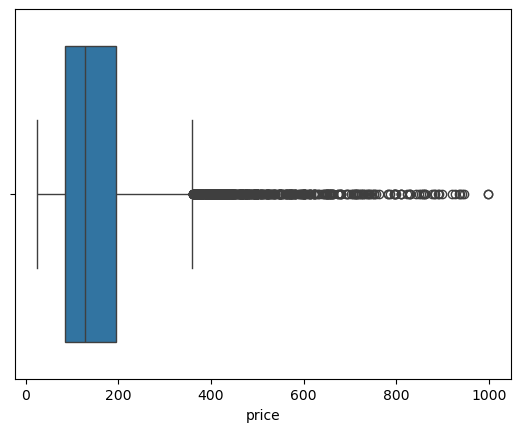

In [1421]:
sns.boxplot(x=df['price'])


**Observation:** In this data, extremely high prices may be luxury listings, not errors. Very low prices may be shared rooms or data entry mistakes.

In [1422]:
df['log_price'] = np.log1p(df['price'])

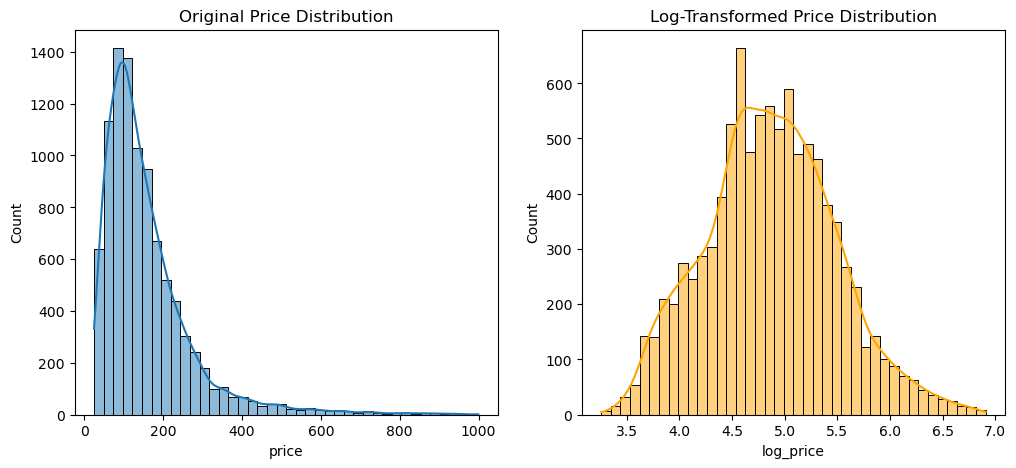

In [1423]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=40, kde=True)
plt.title('Original Price Distribution')

plt.subplot(1,2,2)
sns.histplot(df['log_price'], bins=40, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.show()

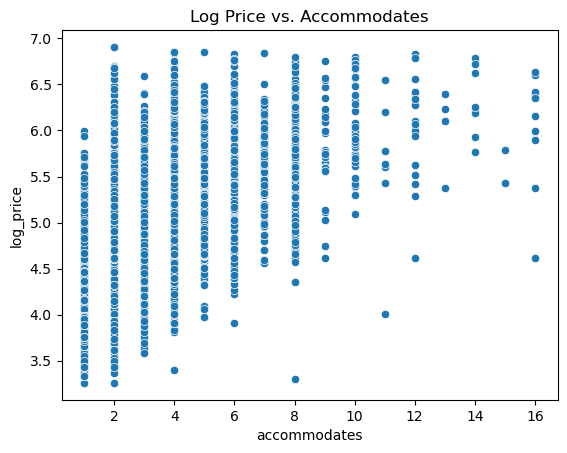

In [1424]:
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Log Price vs. Accommodates')
plt.show()

## 1. `Price Determinants`: Which factors (location, room type, number of reviews, amenities) most strongly relate to nightly price?

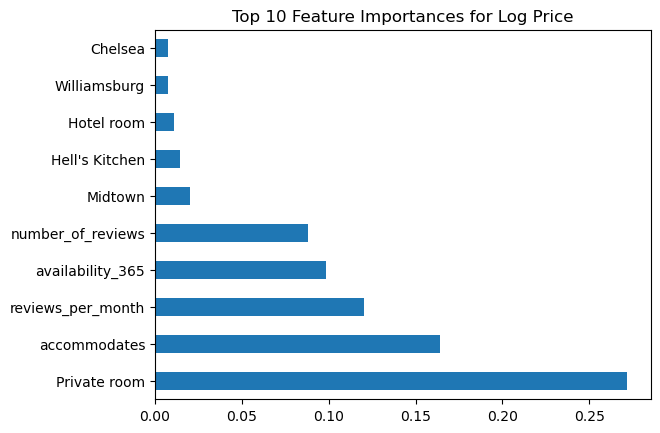

In [1425]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

X = df[['accommodates', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
x = pd.concat([X, pd.get_dummies(df['room_type']), pd.get_dummies(df['neighbourhood_cleansed'])], axis=1)

y = df['log_price']

rf = RandomForestRegressor(n_estimators=100, random_state=42)   
rf.fit(x, y)

importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Log Price')
plt.show()









## 2. `Demand Seasonality`: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

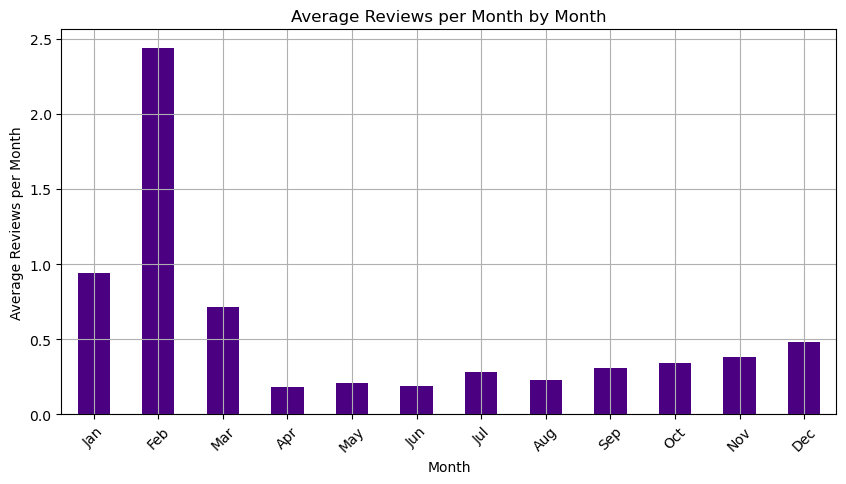

In [1426]:

monthly_reviews_avg = df.groupby('review_month')['reviews_per_month'].median()
plt.figure(figsize=(10, 5))
monthly_reviews_avg.plot(kind='bar', color='#4B0082')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Average Reviews per Month by Month')
plt.xlabel('Month')
plt.ylabel('Average Reviews per Month')
plt.grid(True)
plt.show()


In [1427]:
df_reviews = df[df['last_review'].notna() & df['reviews_per_month'].notna()].copy()
monthly_series = df_reviews.groupby('review_date')['reviews_per_month'].mean().asfreq('MS', fill_value=0)
if len(monthly_series) >= 24:
    decomposition = seasonal_decompose(monthly_series, model='additive', period=12)
    fig = decomposition.plot()
    
    fig.set_size_inches(12, 8)
    plt.show()
else:
    print(f"Insufficient data for seasonal decomposition: {len(monthly_series)} observations. Need at least 24.")
    

Insufficient data for seasonal decomposition: 0 observations. Need at least 24.


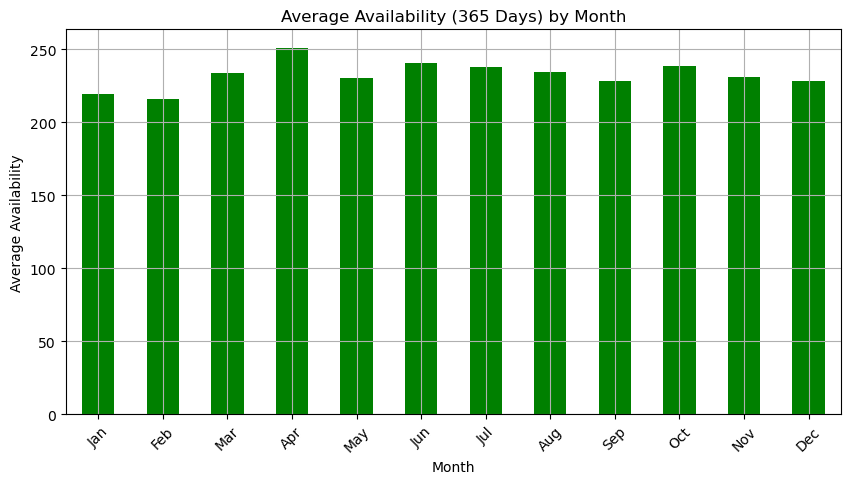

In [1428]:
availability_by_month = df.groupby('review_month')['availability_365'].mean()
plt.figure(figsize=(10, 5))
availability_by_month.plot(kind='bar', color='green')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Average Availability (365 Days) by Month')
plt.xlabel('Month')
plt.ylabel('Average Availability')
plt.grid(True)
plt.show()

In [1429]:
import plotly.graph_objects as go

In [1430]:
df.columns

Index(['name', 'description', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_365',
       'number_of_reviews', 'estimated_revenue_l365d', 'first_review',
       'last_review', 'review_scores_rating', 'has_license',
       'instant_bookable', 'reviews_per_month', 'host_duration_days',
       'active_days', 'review_year', 'review_month', 'review_date',
       'implied_price', 'is_popular', 'log_price'],
      dtype='object')

In [1431]:
# Group by year and calculate average price (optional: median)
price_by_year = df_clean.groupby('review_year')['price'].mean().dropna().reset_index()

# Initialize figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[price_by_year['review_year'].iloc[0]],
    y=[price_by_year['price'].iloc[0]],
    mode='lines+markers',
    name='Average Price'
))


frames = [
    go.Frame(
        data=[go.Scatter(
            x=price_by_year['review_year'].iloc[:i + 1],
            y=price_by_year['price'].iloc[:i + 1],
            mode='lines+markers',
            name='Average Price')],
        name=f'Year {price_by_year["review_year"].iloc[i]}'
    )
    for i in range(1, len(price_by_year))
]

fig.update_layout(
    title='Average Apartment Price Over Time',
    xaxis_title='Year',
    yaxis_title='Average Price (USD)',
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(
                frame=dict(duration=300, redraw=True),
                fromcurrent=True
            )]
        )]
    )],
)
fig.frames=frames

fig.show()

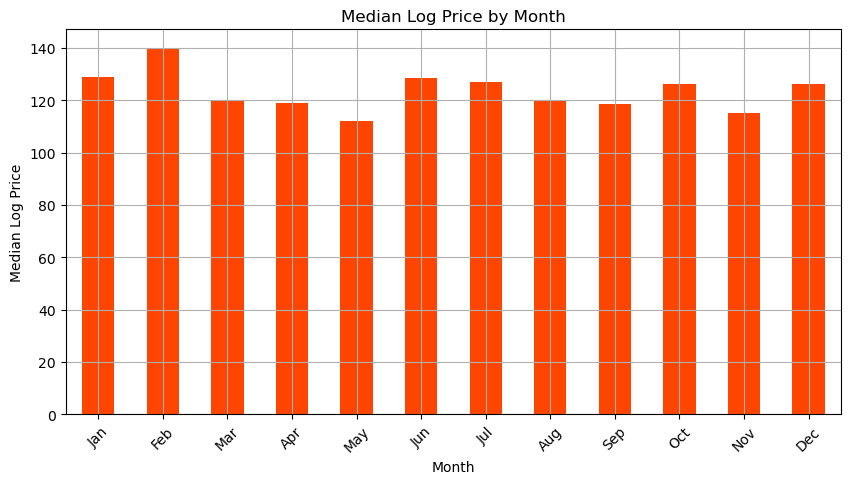

In [1432]:
price_by_month = df.groupby('review_month')['price'].median()
plt.figure(figsize=(10, 5))
price_by_month.plot(kind='bar', color='#FF4500')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Median Log Price by Month')
plt.xlabel('Month')
plt.ylabel('Median Log Price')
plt.grid(True)
plt.show()


Shape of df_price_trends: (9587, 39)
Missing values in key columns:
last_review               0
log_price                 0
neighbourhood_cleansed    0
dtype: int64
Available neighborhoods in data: ['Crown Heights', 'Brooklyn Heights', 'East New York', 'Long Island City']


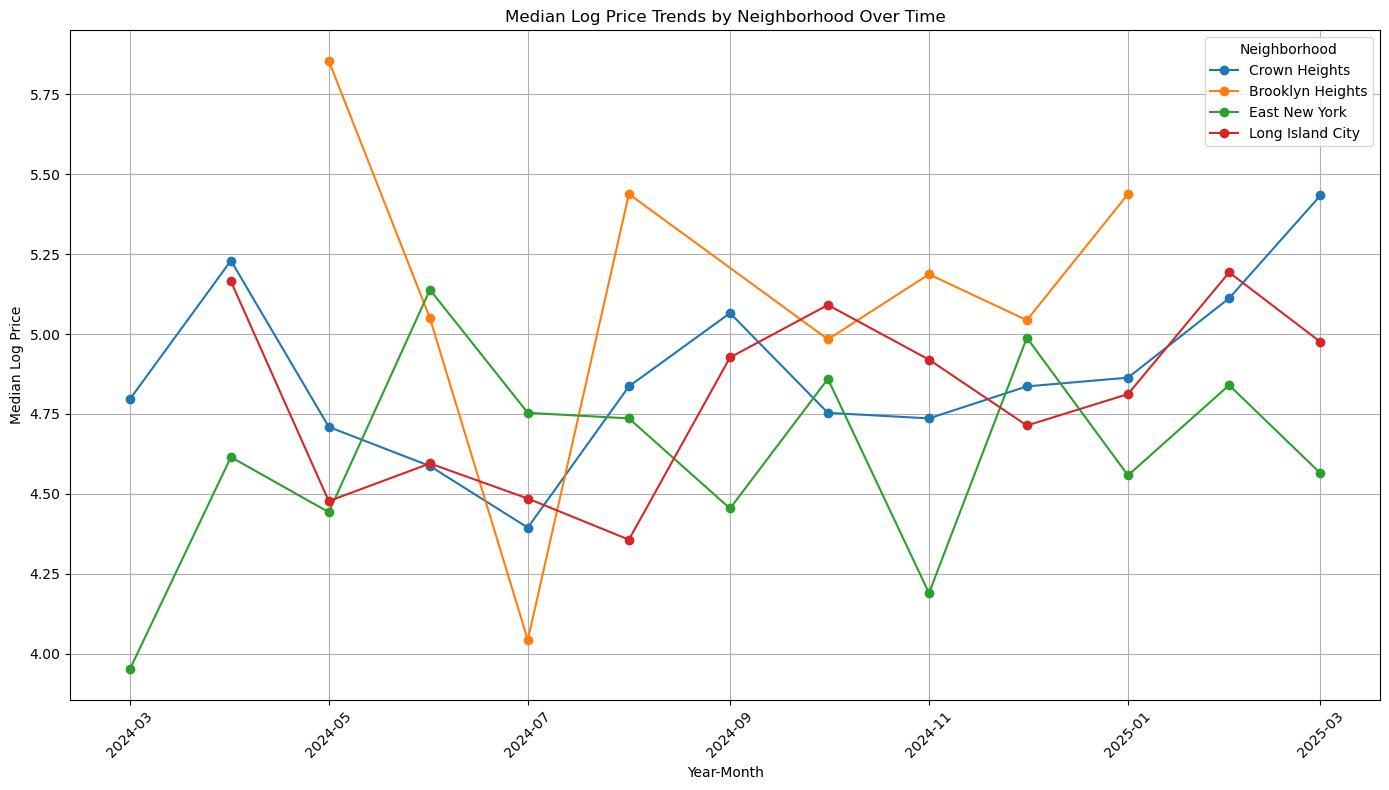

In [1433]:
df_price_trends = df[
    df['last_review'].notna() &
    df['log_price'].notna() &
    df['neighbourhood_cleansed'].notna()
].copy()

print("Shape of df_price_trends:", df_price_trends.shape)
print("Missing values in key columns:")
print(df_price_trends[['last_review', 'log_price', 'neighbourhood_cleansed']].isna().sum())

# If the DataFrame is empty, exit early
if df_price_trends.empty:
    print("No data available for price trend analysis.")
else:
    # Step 2: Convert last_review to year-month
    df_price_trends['year_month'] = df_price_trends['last_review'].dt.to_period('M').dt.to_timestamp()

    # Step 3: Choose your neighborhoods
    nyc_neighborhoods = ['Crown Heights', 'Brooklyn Heights', 'East New York', 'Long Island City']

    # Check which of them are actually in the data
    available_neighborhoods = [
        n for n in nyc_neighborhoods
        if n in df_price_trends['neighbourhood_cleansed'].unique()
    ]

    print("Available neighborhoods in data:", available_neighborhoods)

    if not available_neighborhoods:
        print("❌ None of the specified neighborhoods found.")
    else:
        # Step 4: Group by neighborhood and year-month
        price_by_neighborhood = (
            df_price_trends
            .groupby(['neighbourhood_cleansed', 'year_month'])['log_price']
            .median()
            .reset_index()
        )

        # Step 5: Plot
        plt.figure(figsize=(14, 8))
        for neighborhood in available_neighborhoods:
            subset = price_by_neighborhood[
                price_by_neighborhood['neighbourhood_cleansed'] == neighborhood
            ]
            if not subset.empty:
                plt.plot(
                    subset['year_month'],
                    subset['log_price'],
                    marker='o',
                    label=neighborhood
                )
            else:
                print(f" No price data for {neighborhood}")

        plt.title('Median Log Price Trends by Neighborhood Over Time')
        plt.xlabel('Year-Month')
        plt.ylabel('Median Log Price')
        plt.legend(title='Neighborhood')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## 3. `Review Impact`: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?

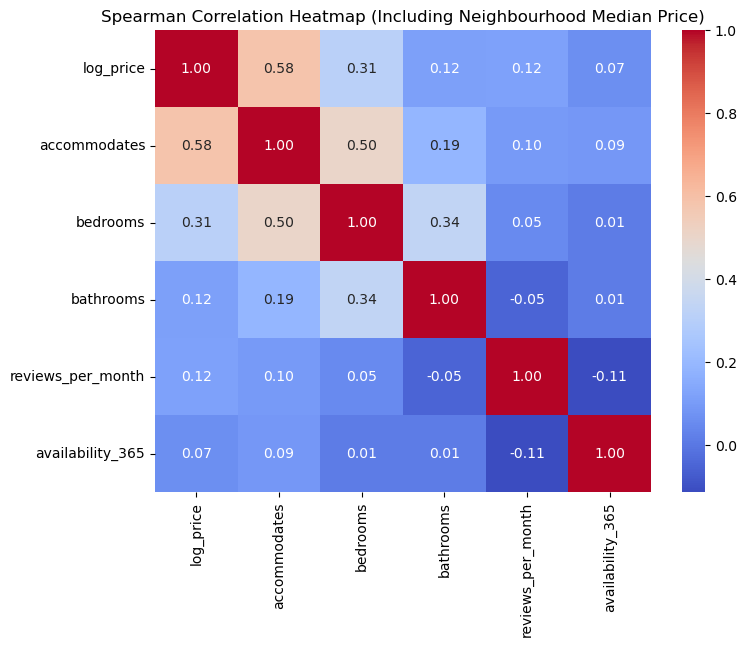

In [1434]:
neigh_price = df.groupby('neighbourhood_cleansed')['log_price'].median()
df['neigh_log_price_mean'] = df['neighbourhood_cleansed'].map(neigh_price)

# 2. Select features for heatmap
selected = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'reviews_per_month', 'availability_365']
small_corr = df[selected].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(small_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap (Including Neighbourhood Median Price)')
plt.show()

## 4. `Listing Characteristics`: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

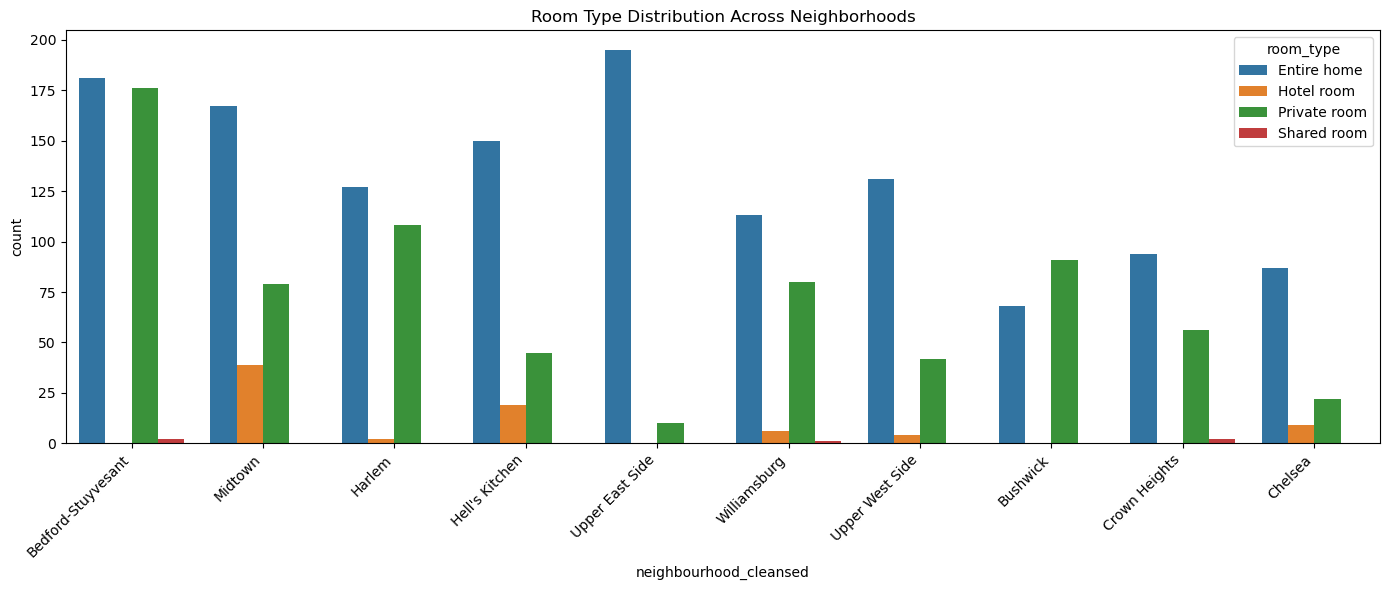

In [1435]:
sample_df = df.sample(n=5000, random_state=42)

plt.figure(figsize=(14, 6))
sns.countplot(data=sample_df, x='neighbourhood_cleansed', hue='room_type',
              order=sample_df['neighbourhood_cleansed'].value_counts().index[:10])  # Top 10 neighborhoods
plt.title('Room Type Distribution Across Neighborhoods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [1436]:
## 5. `PCA and Clustering`

In [1437]:
df.columns

Index(['name', 'description', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_365',
       'number_of_reviews', 'estimated_revenue_l365d', 'first_review',
       'last_review', 'review_scores_rating', 'has_license',
       'instant_bookable', 'reviews_per_month', 'host_duration_days',
       'active_days', 'review_year', 'review_month', 'review_date',
       'implied_price', 'is_popular', 'log_price', 'neigh_log_price_mean'],
      dtype='object')

In [1438]:
df['amenities'].unique()

array(['["Oven", "Rice maker", "Laundromat nearby", "Luggage dropoff allowed", "Dedicated workspace", "Keypad", "Cooking basics", "Microwave", "Hair dryer", "Window AC unit", "Self check-in", "Essentials", "Long term stays allowed", "Iron", "Bed linens", "TV with standard cable", "Dishwasher", "Stove", "Heating", "Free street parking", "Dishes and silverware", "Hot water", "Wifi", "Kitchen", "Coffee maker", "Refrigerator", "Hangers", "Baking sheet", "Freezer"]',
       '["Oven", "Fire extinguisher", "Extra pillows and blankets", "Cooking basics", "Microwave", "Hair dryer", "Essentials", "Iron", "Bed linens", "Dishwasher", "Stove", "Heating", "TV", "Washer", "Free street parking", "Air conditioning", "Dishes and silverware", "Carbon monoxide alarm", "Hot water", "Wifi", "Smoke alarm", "Kitchen", "Coffee maker", "Refrigerator", "Hangers", "Shampoo"]',
       '["Fire extinguisher", "Extra pillows and blankets", "Hair dryer", "Host greets you", "Iron", "Bed linens", "Paid parking off premi

In [1439]:
mlb = MultiLabelBinarizer()

In [1440]:
amenities_encoded = mlb.fit_transform(df['amenities'])


In [1441]:
df_amenities_ohe = pd.DataFrame(amenities_encoded, columns=mlb.classes_, index=df.index)


In [1442]:
numerical_features = ['log_price', 'bedrooms', 'bathrooms','number_of_reviews', 'latitude', 'longitude', 'review_scores_rating']

In [1443]:
X = pd.concat([df[numerical_features], df_amenities_ohe], axis=1)


In [1444]:
X.dropna(inplace=True)

In [1445]:
X.isna().sum()

log_price            0
bedrooms             0
bathrooms            0
number_of_reviews    0
latitude             0
                    ..
v                    0
w                    0
x                    0
y                    0
z                    0
Length: 87, dtype: int64

In [1446]:
print(f"\n--- Shape of Combined Feature Matrix (X) for PCA: {X.shape} ---")
print("Combined Feature Matrix (X) head (showing numerical and some amenity features):")
print(X[numerical_features[:3] + list(df_amenities_ohe.columns[:3])].head())


--- Shape of Combined Feature Matrix (X) for PCA: (9583, 87) ---
Combined Feature Matrix (X) head (showing numerical and some amenity features):
    log_price  bedrooms  bathrooms     !  "
4    4.875197         1        1.0  1  0  1
7    4.574711         2        1.0  1  0  1
9    4.219508         2        1.0  1  0  1
11   5.278115         1        1.0  1  0  1
16   5.017280         1        1.0  1  0  1


In [1447]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1448]:
print("Principal Components (first 5 rows):")
print(pcs[:5])

Principal Components (first 5 rows):
[[-0.19410017 -1.05198179 -2.23898906]
 [-0.05253709 -1.8433531  -1.81188877]
 [-0.3330662  -2.33743759 -0.89876864]
 [ 1.16403604  3.47945309  0.85196294]
 [-0.03847604 -1.76793816 -1.85024068]]


In [1449]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(X_scaled)

In [1450]:
df_pca = df.loc[X.index].copy()
df_pca['PC1'] = pcs[:, 0]
df_pca['PC2'] = pcs[:, 1]
df_pca['PC3'] = pcs[:, 2]

In [1451]:
print("\n--- DataFrame with PCA Results (Head) ---")
print(df_pca[['log_price', 'accommodates', 'latitude', 'longitude', 'amenities', 'PC1', 'PC2', 'PC3']].head())



--- DataFrame with PCA Results (Head) ---
    log_price  accommodates   latitude  longitude  \
4    4.875197             2  40.710651 -73.950874   
7    4.574711             3  40.709350 -73.953420   
9    4.219508             1  40.787780 -73.947590   
11   5.278115             2  40.691940 -73.973890   
16   5.017280             2  40.673600 -73.955100   

                                            amenities       PC1       PC2  \
4   ["Oven", "Rice maker", "Laundromat nearby", "L... -0.194100 -1.051982   
7   ["Oven", "Fire extinguisher", "Extra pillows a... -0.052537 -1.843353   
9   ["Fire extinguisher", "Extra pillows and blank... -0.333066 -2.337438   
11  ["Garden view", "Fire extinguisher", "First ai...  1.164036  3.479453   
16  ["Oven", "Cooking basics", "Microwave", "Hair ... -0.038476 -1.767938   

         PC3  
4  -2.238989  
7  -1.811889  
9  -0.898769  
11  0.851963  
16 -1.850241  


In [1452]:
print("\n--- Explained Variance Ratio ---")
print(f"Explained variance ratio by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Explained variance ratio by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Explained variance ratio by PC3: {pca.explained_variance_ratio_[2]:.4f}") # Added PC3 variance
print(f"Total explained variance by 3 components: {pca.explained_variance_ratio_.sum():.4f}") # Updated total


--- Explained Variance Ratio ---
Explained variance ratio by PC1: 0.1806
Explained variance ratio by PC2: 0.0998
Explained variance ratio by PC3: 0.0461
Total explained variance by 3 components: 0.3265


In [1453]:
feature_names = X.columns
loadings = pd.DataFrame(pca.components_.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=feature_names) # Updated columns


In [1454]:
print("\n--- PCA Component Loadings (Top 5 contributing features for PC1) ---")
print(loadings['PC1_loading'].nlargest(5))
print("\n--- PCA Component Loadings (Bottom 5 contributing features for PC1) ---")
print(loadings['PC1_loading'].nsmallest(5))
print("\n--- PCA Component Loadings (Top 5 contributing features for PC3) ---") # Added PC3 loadings
print(loadings['PC3_loading'].nlargest(5))


--- PCA Component Loadings (Top 5 contributing features for PC1) ---
c    0.231722
n    0.231722
t    0.231722
,    0.227374
     0.227374
Name: PC1_loading, dtype: float64

--- PCA Component Loadings (Bottom 5 contributing features for PC1) ---
latitude   -0.009732
[          -0.000000
]          -0.000000
;           0.000518
%           0.001059
Name: PC1_loading, dtype: float64

--- PCA Component Loadings (Top 5 contributing features for PC3) ---
\    0.279687
1    0.278845
2    0.271399
0    0.271234
3    0.238917
Name: PC3_loading, dtype: float64


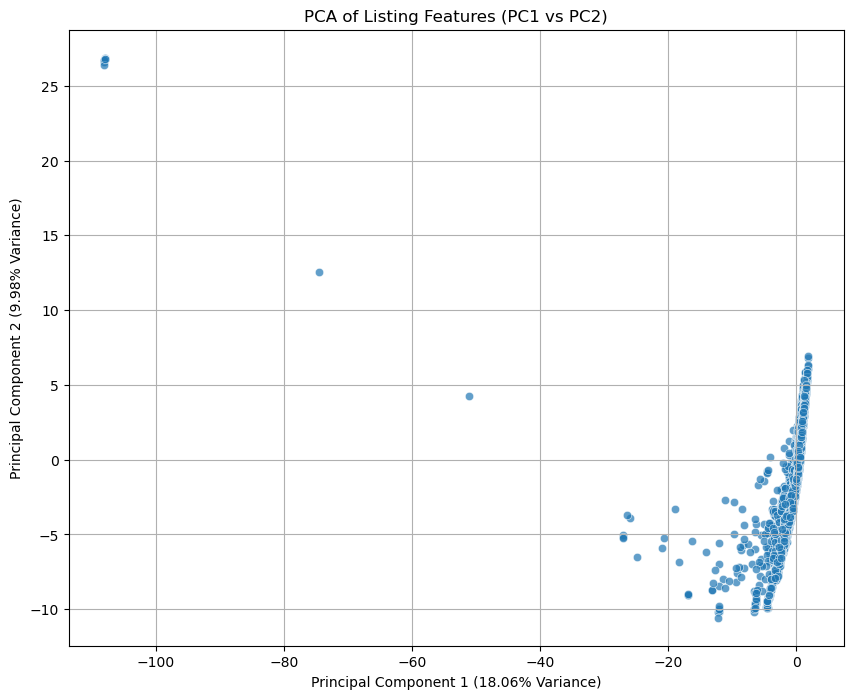

In [1455]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.7)
plt.title('PCA of Listing Features (PC1 vs PC2)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

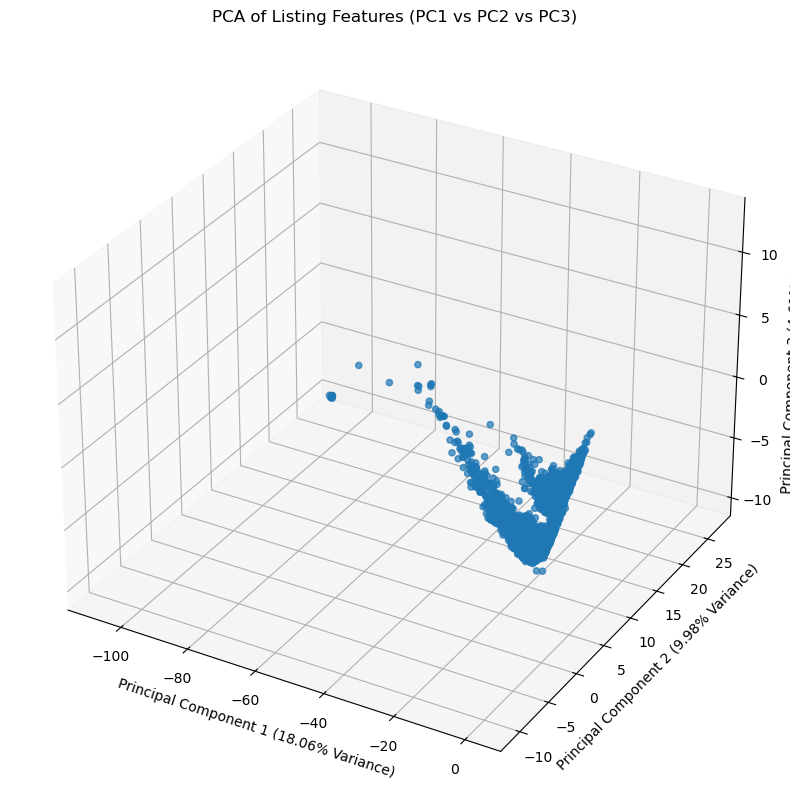

In [1456]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.7)
ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
ax.set_zlabel(f'Principal Component 3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)')
plt.title('PCA of Listing Features (PC1 vs PC2 vs PC3)')
plt.show()


PC1 explains about 18.06% of the variance, and PC2 explains about 9.98%. This means that these two components together explain approximately 28.04% of the total variance in your data.

The fact that these percentages are relatively low (less than 50% for two components) is common for complex, real-world datasets. It implies that there's still a lot of variability in your data that is captured by higher-order principal components (PC3, PC4, etc.) that are not visible in this 2D plot.

Go back to your df_pca DataFrame, find the rows corresponding to the points that are far from the cluster, and examine their original feature values. What makes them unique?

In [1457]:
import folium

# Center the map on the mean latitude and longitude of your listings
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add each listing as a circle marker
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Price: {row['price']}"  # You can customize this popup
    ).add_to(m)

# Save the map to an HTML file
m.save('airbnb_map.html')

In [1458]:
import folium

df1 = df.sample(random_state=42, n=500, ignore_index=True)
# Center of map (mean coordinates or fixed point)
center_lat = df1['latitude'].mean()
center_lon = df1['longitude'].mean()

# Create map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers
for idx, row in df1.iterrows():
    popup_text = f"""
    <b>Location:</b> {row.get('latitude', 'N/A')}<br>
    <b>Location:</b> {row.get('longitude', 'N/A')}<br>
    <b>Price:</b> {row.get('price', 'N/A')}<br>
    <b>Neighbourhood:</b> {row.get('neighbourhood_cleansed', 'N/A')}<br>
    <b>Review Score:</b> {row.get('review_scores_accuracy', 'N/A')}<br>
    <b>Review count:</b> {row.get('number_of_reviews', 'N/A')}<br>
    
    <b>Desctiption:</b> {row.get('description', 'N/A')}<br>

    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=row.get('address', 'Click for details')
    ).add_to(m)

# Save to HTML
m.save('apartments_map.html')


In [1459]:
n_clusters = 3 # Example: Let's try to find 3 cluster
X_clusters = df_pca[['PC1', 'PC2', 'PC3']] #
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init='auto' or a number
df_pca['cluster'] = kmeans.fit_predict(X_clusters)


In [1461]:
print(f"\n--- Cluster Distribution (for {n_clusters} clusters) ---")
print(df_pca['cluster'].value_counts())


--- Cluster Distribution (for 3 clusters) ---
cluster
0    5242
1    4330
2      11
Name: count, dtype: int64


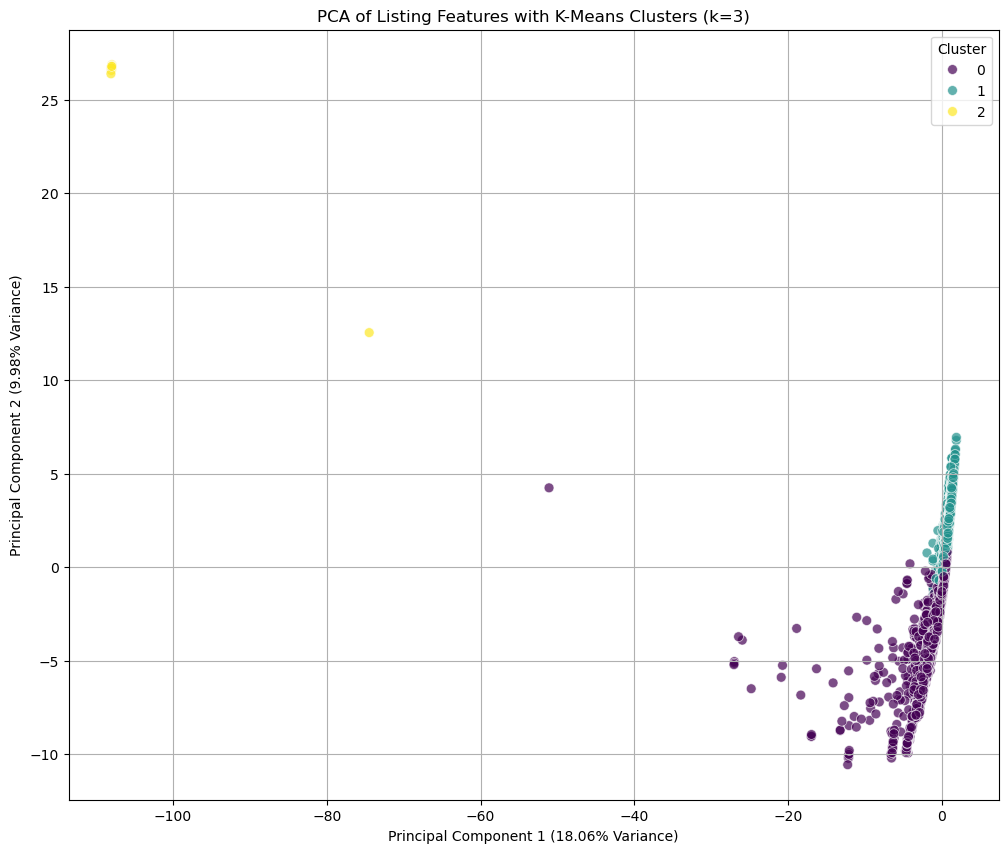

In [1463]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', alpha=0.7, s=50)
plt.title(f'PCA of Listing Features with K-Means Clusters (k={n_clusters})')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

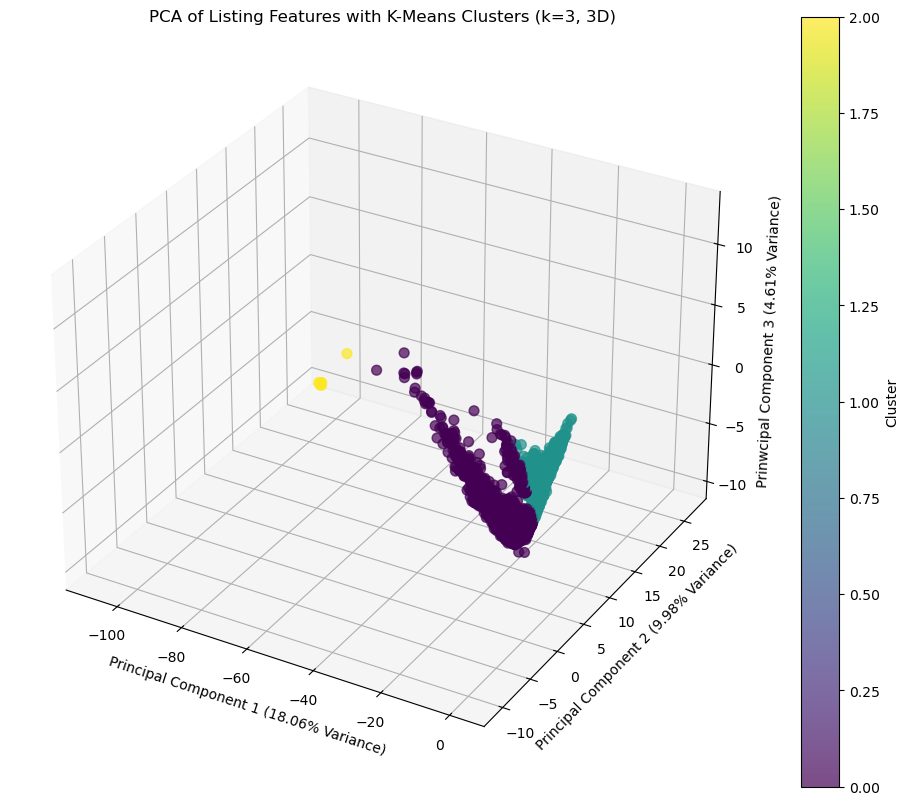

In [1464]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', alpha=0.7, s=50)
ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
ax.set_zlabel(f'Prinwcipal Component 3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)')
plt.title(f'PCA of Listing Features with K-Means Clusters (k={n_clusters}, 3D)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()